In [163]:
import pandas as pd

survey = pd.read_csv("masculinity.csv")

In [164]:
print(survey.columns)

Index(['Unnamed: 0', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
      

In [201]:
# oh no

survey['q0026'].value_counts()
survey[['q0026']].isnull().sum()

q0026    0
dtype: int64

In [166]:
survey.shape

(1189, 98)

In [ ]:
# Scale: 0,1,2,3,4,5. 0 is non-masc, 5 is masc. 3 is in

In [167]:
# Ideas of Masculinity to Map:
ideas_cols_to_map = ['q0001', 'q0002'] #4 choices each
sexual_orientation = ['q0026']
lifestyle_cols_to_map_nomasc = ["q0007_0002", "q0007_0003", "q0007_0004", "q0007_0007", "q0007_0010", "q0007_0011"]
lifestyle_cols_to_map_masc = ["q0007_0005", "q0007_0006", "q0007_0008", "q0007_0009"]
cols_to_map = lifestyle_cols_to_map_nomasc + lifestyle_cols_to_map_masc


In [168]:
cols_to_map = lifestyle_cols_to_map_nomasc + lifestyle_cols_to_map_masc

for column in lifestyle_cols_to_map_nomasc:
    survey[column] = survey[column].map({"Often": 0, "Sometimes": 1, "Rarely": 2, "No answer": 3, "Never, but open to it": 3, "Never, and not open to it": 4})
    
for column in lifestyle_cols_to_map_masc:
    survey[column] = survey[column].map({"Often": 4, "Sometimes": 3, "Rarely": 2, "Never, but open to it": 1, "Never, and not open to it": 0})
    
survey['q0001'] = survey['q0001'].map({"Very masculine": 3, "Somewhat masculine": 2, "Not very masculine": 1, "Not at all masculine": 0})
survey['q0002'] = survey['q0002'].map({"Very important:": 3, "Somewhat important": 2, "Not too important": 1, "Not at all important": 0})

In [183]:
#Holy fuck you absolute noggins labelled 'nan' as no answer and Nan im so done
survey[['q0026', 'orientation']]

,q0026,orientation
0,0,Gay/Bisexual
1,1,Straight
2,1,Straight
3,0,No answer
4,1,Straight
...,...,...
1184,0,Gay/Bisexual
1185,1,Straight
1186,1,Straight
1187,1,Straight


In [169]:
#mapping sexual orientation: straight = 1, else 0    

survey['q0026'] = survey['q0026'].map(lambda x: 1 if x == 'Straight' else 0)

In [170]:
# 'needed' in the sense that this is information that we want to investigate our question
needed_df = survey.dropna(subset = ideas_cols_to_map + sexual_orientation + cols_to_map)
needed_df = needed_df[ideas_cols_to_map + sexual_orientation + cols_to_map]

In [171]:
survey

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,2.0,2.0,Not selected,Not selected,Not selected,Pop culture,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,2.0,2.0,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,3.0,1.0,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,3.0,1.0,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5,5/10/18 7:35,5/10/18 7:42,3.0,NaN,Not selected,Not selected,Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,1185,5/19/18 7:50,5/19/18 8:00,2.0,0.0,Not selected,Mother or mother figure(s),Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,Non-white,Other,Some college,Some college,35 - 64,No children,Gay/Bisexual,1.571755
1185,1186,5/19/18 7:52,5/19/18 8:03,2.0,2.0,Not selected,Not selected,Not selected,Not selected,Not selected,...,New England,Windows Desktop / Laptop,White,White,High school or less,High school or less,35 - 64,Has children,Straight,2.446719
1186,1187,5/19/18 7:58,5/19/18 8:04,3.0,NaN,Father or father figure(s),Mother or mother figure(s),Not selected,Not selected,Not selected,...,Pacific,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,0.615180
1187,1188,5/19/18 8:52,5/19/18 8:59,2.0,NaN,Father or father figure(s),Mother or mother figure(s),Not selected,Pop culture,Not selected,...,Middle Atlantic,iOS Phone / Tablet,Non-white,Other,College or more,College or more,18 - 34,No children,Straight,2.965508


In [172]:
needed_df

,q0001,q0002,q0026,q0007_0002,q0007_0003,q0007_0004,q0007_0007,q0007_0010,q0007_0011,q0007_0005,q0007_0006,q0007_0008,q0007_0009
0,2.0,2.0,0,0,0,0,0,4,0,0.0,0.0,3.0,3.0
1,2.0,2.0,1,1,3,2,4,1,3,0.0,2.0,4.0,0.0
2,3.0,1.0,1,1,1,2,4,2,4,1.0,4.0,2.0,3.0
3,3.0,1.0,0,2,1,2,4,4,4,2.0,4.0,0.0,2.0
5,3.0,2.0,1,1,1,2,4,3,4,1.0,4.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,2.0,2.0,1,2,4,4,4,4,1,1.0,2.0,0.0,0.0
1183,3.0,0.0,1,0,1,1,4,3,1,0.0,2.0,0.0,2.0
1184,2.0,0.0,0,1,0,1,1,4,3,3.0,3.0,0.0,3.0
1185,2.0,2.0,1,1,2,2,4,1,2,1.0,4.0,4.0,4.0


In [173]:
# The data now needs to be normalized, as ideas_cols_to_map columns were on a 4 points scale, others were on 5.
normalized_df=(needed_df-needed_df.min())/(needed_df.max()-needed_df.min())

In [174]:
normalized_df

,q0001,q0002,q0026,q0007_0002,q0007_0003,q0007_0004,q0007_0007,q0007_0010,q0007_0011,q0007_0005,q0007_0006,q0007_0008,q0007_0009
0,0.666667,1.0,0.0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.75,0.75
1,0.666667,1.0,1.0,0.25,0.75,0.50,1.00,0.25,0.75,0.00,0.50,1.00,0.00
2,1.000000,0.5,1.0,0.25,0.25,0.50,1.00,0.50,1.00,0.25,1.00,0.50,0.75
3,1.000000,0.5,0.0,0.50,0.25,0.50,1.00,1.00,1.00,0.50,1.00,0.00,0.50
5,1.000000,1.0,1.0,0.25,0.25,0.50,1.00,0.75,1.00,0.25,1.00,0.75,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,0.666667,1.0,1.0,0.50,1.00,1.00,1.00,1.00,0.25,0.25,0.50,0.00,0.00
1183,1.000000,0.0,1.0,0.00,0.25,0.25,1.00,0.75,0.25,0.00,0.50,0.00,0.50
1184,0.666667,0.0,0.0,0.25,0.00,0.25,0.25,1.00,0.75,0.75,0.75,0.00,0.75
1185,0.666667,1.0,1.0,0.25,0.50,0.50,1.00,0.25,0.50,0.25,1.00,1.00,1.00


In [175]:
from sklearn.model_selection import train_test_split

#recall cols_to_map represents masculine actions, and ideas_cols_to_maps represent masculine opinions 
data = normalized_df[cols_to_map + ideas_cols_to_map]
labels = normalized_df['q0026'] #column on sexual orientation
print(data)
print(labels)

      q0007_0002  q0007_0003  q0007_0004  q0007_0007  q0007_0010  q0007_0011  \
0           0.00        0.00        0.00        0.00        1.00        0.00   
1           0.25        0.75        0.50        1.00        0.25        0.75   
2           0.25        0.25        0.50        1.00        0.50        1.00   
3           0.50        0.25        0.50        1.00        1.00        1.00   
5           0.25        0.25        0.50        1.00        0.75        1.00   
...          ...         ...         ...         ...         ...         ...   
1182        0.50        1.00        1.00        1.00        1.00        0.25   
1183        0.00        0.25        0.25        1.00        0.75        0.25   
1184        0.25        0.00        0.25        0.25        1.00        0.75   
1185        0.25        0.50        0.50        1.00        0.25        0.50   
1188        0.50        0.50        1.00        1.00        1.00        0.50   

      q0007_0005  q0007_0006  q0007_000

In [176]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = 1)

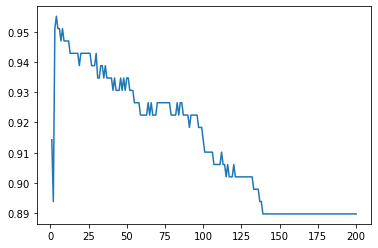

3


In [49]:
#K-Nearest Neighbours Test
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

scores = []
for k in range(1, 201):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))

plt.plot(range(1,201), scores)
plt.show()
index_max = max(range(len(scores)), key=scores.__getitem__)
print(index_max) #3

In [51]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(train_data, train_labels)
guesses = classifier.predict(test_data)

0.9510204081632653


In [53]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(accuracy_score(test_labels, guesses))
print(recall_score(test_labels, guesses))
print(precision_score(test_labels, guesses))
print(f1_score(test_labels, guesses))

0.9510204081632653
0.9908256880733946
0.9557522123893806
0.9729729729729731


In [54]:
normalized_df['q0026'].value_counts() # 848/848 + 129 = 0.86 

1.0    848
0.0    129
Name: q0026, dtype: int64

In [57]:
from collections import Counter
counter = Counter(train_labels)
print(counter)
counter = Counter(test_labels)
print(counter) # 89

Counter({1.0: 630, 0.0: 102})
Counter({1.0: 218, 0.0: 27})


In [103]:
import numpy as np

def average_k_neighbours_testing(iterations, data, labels):
    f1_scores = [] 
    accuracy_scores = []
    for i in range(iterations):
        train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = i)
        #print(f"The trainings labels are distributed {Counter(train_labels)} and the test like so: {Counter(test_labels)}")
        classifier = KNeighborsClassifier(n_neighbors = 3)
        classifier.fit(train_data, train_labels)
        guesses = classifier.predict(test_data)
        f1_scores.append(f1_score(test_labels, guesses))
        accuracy_scores.append(accuracy_score(test_labels, guesses))
        
    plt.plot(range(0,iterations), f1_scores, 'ro')
    plt.xlabel('Random Iteration Number')
    plt.ylabel('F1 Score')
    plt.show()
    
    return sum(f1_scores)/iterations, sum(accuracy_scores)/iterations
    

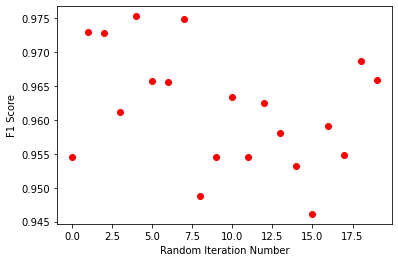

(0.9616192837341699, 0.9316326530612244)

In [104]:
average_k_neighbours_testing(20, data, labels)

In [105]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
data, labels = oversample.fit_resample(data, labels)
# summarize the new class distribution
counter = Counter(labels)
print(counter)

Counter({0.0: 848, 1.0: 848})


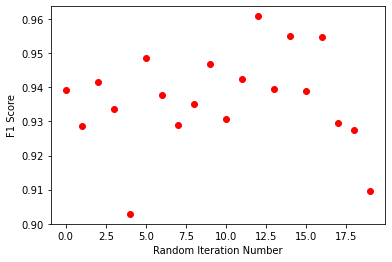

(0.936582583618541, 0.94127358490566)

In [106]:
average_k_neighbours_testing(20, data, labels)

[0.7282841837274918, -0.04550747643178254, -0.005130408636694085, 8.736515048972333, 0.4519835085339248, -0.25574993526833395, -0.9908735419880564, 2.25413473571662, 0.3916104424977829, -0.05882343096520422, 0.787886818593577, 0.46073900969663273]


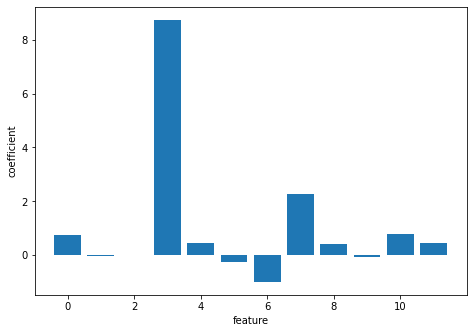

0.9229287090558767


In [281]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = 25 )
# Save the model coefficients and intercept here
model.fit(train_data, train_labels)
coefficients = model.coef_

coefficients = coefficients.tolist()[0]
print(coefficients)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = range(0,12)
students = coefficients
ax.bar(langs,students)
plt.xlabel('feature')
plt.ylabel('coefficient')
plt.show()

predictions = model.predict(test_data)
print(accuracy_score(test_labels, predictions))

#Features in reference:

#["q0007_0002", "q0007_0003", "q0007_0004", "q0007_0007", "q0007_0010", "q0007_0011", # Non-Masc Features 
# "q0007_0005", "q0007_0006", "q0007_0008", "q0007_0009", 'q0001', 'q0002'] # Masc Features

In [143]:
from sklearn.linear_model import LogisticRegression
accuracy = 0
for i in range(0, 20):
    model = LogisticRegression()
    train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = i)
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)
    accuracy += accuracy_score(test_labels, predictions)
    
print(accuracy / 20)

0.9141509433962265


0.9213443396226415


In [150]:
# how many piece of data did we lose?
survey.shape
unaltered_df_data =  survey[ideas_cols_to_map + sexual_orientation + cols_to_map]

(1189, 98)

In [182]:
unaltered_df_data
#unaltered_df_data.isnull().sum()

,q0001,q0002,q0026,q0007_0002,q0007_0003,q0007_0004,q0007_0007,q0007_0010,q0007_0011,q0007_0005,q0007_0006,q0007_0008,q0007_0009
0,2.0,2.0,0,0,0,0,0,4,0,0.0,0.0,3.0,3.0
1,2.0,2.0,1,1,3,2,4,1,3,0.0,2.0,4.0,0.0
2,3.0,1.0,1,1,1,2,4,2,4,1.0,4.0,2.0,3.0
3,3.0,1.0,0,2,1,2,4,4,4,2.0,4.0,0.0,2.0
4,3.0,NaN,1,2,4,3,4,3,1,1.0,3.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,2.0,0.0,0,1,0,1,1,4,3,3.0,3.0,0.0,3.0
1185,2.0,2.0,1,1,2,2,4,1,2,1.0,4.0,4.0,4.0
1186,3.0,NaN,1,1,4,1,4,3,1,2.0,4.0,3.0,3.0
1187,2.0,NaN,1,3,4,4,4,4,2,3.0,3.0,4.0,4.0


In [178]:
unaltered_df_data = unaltered_df_data.dropna(subset = sexual_orientation)
unaltered_df_data.shape # 1189 - 997 = 192

(1189, 13)

In [179]:
unaltered_df_data
unaltered_df_data.isnull().sum()

q0001          11
q0002         143
q0026           0
q0007_0002      0
q0007_0003      0
q0007_0004      0
q0007_0007      0
q0007_0010      0
q0007_0011      0
q0007_0005      5
q0007_0006     30
q0007_0008     11
q0007_0009     34
dtype: int64

In [202]:
# -- SECOND ATTEMPT, CORRECTLY CLEANING DATA + MISSING VALUES --

new_survey = pd.read_csv("masculinity.csv")

# Ideas of Masculinity to Map:
ideas_cols_to_map = ['q0001', 'q0002'] #4 choices each
sexual_orientation = ['q0026']
lifestyle_cols_to_map_nomasc = ["q0007_0002", "q0007_0003", "q0007_0004", "q0007_0007", "q0007_0010", "q0007_0011"]
lifestyle_cols_to_map_masc = ["q0007_0005", "q0007_0006", "q0007_0008", "q0007_0009"]
cols_to_map = lifestyle_cols_to_map_nomasc + lifestyle_cols_to_map_masc
useful_columns = ideas_cols_to_map + cols_to_map + sexual_orientation

In [209]:
new_survey['q0001'].value_counts()
#it turns out the dropna didn't do anything, it was the doing of the mapping
useful_df = new_survey[useful_columns]
useful_df.isnull().sum()

q0001         0
q0002         0
q0007_0002    0
q0007_0003    0
q0007_0004    0
q0007_0007    0
q0007_0010    0
q0007_0011    0
q0007_0005    0
q0007_0006    0
q0007_0008    0
q0007_0009    0
q0026         0
dtype: int64

In [213]:
for column in useful_columns:
    print(new_survey[column].value_counts())
    
useful_df = useful_df.replace('No answer', np.nan)

Somewhat masculine      617
Very masculine          443
Not very masculine       97
Not at all masculine     21
No answer                11
Name: q0001, dtype: int64
Somewhat important      465
Not too important       401
Not at all important    180
Very important          138
No answer                 5
Name: q0002, dtype: int64
Sometimes                    514
Rarely                       387
Often                        123
Never, but open to it        101
Never, and not open to it     50
No answer                     14
Name: q0007_0002, dtype: int64
Sometimes                    364
Rarely                       339
Never, and not open to it    224
Often                        166
Never, but open to it         85
No answer                     11
Name: q0007_0003, dtype: int64
Rarely                       505
Sometimes                    371
Never, but open to it        121
Never, and not open to it     78
No answer                     71
Often                         43
Name: q0007_

In [217]:
useful_df.shape

(1189, 13)

In [218]:
useful_df.isnull().sum()
useful_df = useful_df.dropna(subset = sexual_orientation)
useful_df.isnull().sum()

q0001         11
q0002          5
q0007_0002    14
q0007_0003    11
q0007_0004    71
q0007_0007    15
q0007_0010    26
q0007_0011    21
q0007_0005     5
q0007_0006    27
q0007_0008    10
q0007_0009    34
q0026          0
dtype: int64

In [223]:
for column in lifestyle_cols_to_map_nomasc:
    useful_df[column] = useful_df[column].map({"Often": 0, "Sometimes": 1, "Rarely": 2, "No answer": 3, "Never, but open to it": 3, "Never, and not open to it": 4})
    
for column in lifestyle_cols_to_map_masc:
    useful_df[column] = useful_df[column].map({"Often": 4, "Sometimes": 3, "Rarely": 2, "Never, but open to it": 1, "Never, and not open to it": 0})
    
useful_df['q0001'] = useful_df['q0001'].map({"Very masculine": 3, "Somewhat masculine": 2, "Not very masculine": 1, "Not at all masculine": 0})
useful_df['q0002'] = useful_df['q0002'].map({"Very important:": 3, "Somewhat important": 2, "Not too important": 1, "Not at all important": 0})
useful_df['q0026'] = useful_df['q0026'].map(lambda x: 1 if x == 'Straight' else 0)

In [224]:
useful_df

,q0001,q0002,q0007_0002,q0007_0003,q0007_0004,q0007_0007,q0007_0010,q0007_0011,q0007_0005,q0007_0006,q0007_0008,q0007_0009,q0026
0,2.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,3.0,0
1,2.0,2.0,1.0,3.0,2.0,4.0,1.0,NaN,0.0,2.0,4.0,0.0,1
2,3.0,1.0,1.0,1.0,2.0,4.0,2.0,4.0,1.0,4.0,2.0,3.0,1
4,3.0,NaN,2.0,4.0,3.0,4.0,3.0,1.0,1.0,3.0,4.0,2.0,1
5,3.0,2.0,1.0,1.0,2.0,4.0,3.0,4.0,1.0,4.0,3.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,2.0,0.0,1.0,0.0,1.0,1.0,4.0,NaN,3.0,3.0,0.0,3.0,0
1185,2.0,2.0,1.0,2.0,2.0,4.0,1.0,2.0,1.0,4.0,4.0,4.0,1
1186,3.0,NaN,1.0,4.0,1.0,4.0,3.0,1.0,2.0,4.0,3.0,3.0,1
1187,2.0,NaN,3.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,1


In [231]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
useful_df_array = imputer.fit_transform(useful_df)



In [232]:
useful_df = pd.DataFrame(useful_df_array)
useful_df.columns = useful_columns
useful_df

,q0001,q0002,q0007_0002,q0007_0003,q0007_0004,q0007_0007,q0007_0010,q0007_0011,q0007_0005,q0007_0006,q0007_0008,q0007_0009,q0026
0,2.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,3.0,0.0
1,2.0,2.0,1.0,3.0,2.0,4.0,1.0,1.0,0.0,2.0,4.0,0.0,1.0
2,3.0,1.0,1.0,1.0,2.0,4.0,2.0,4.0,1.0,4.0,2.0,3.0,1.0
3,3.0,2.0,2.0,4.0,3.0,4.0,3.0,1.0,1.0,3.0,4.0,2.0,1.0
4,3.0,2.0,1.0,1.0,2.0,4.0,3.0,4.0,1.0,4.0,3.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,2.0,0.0,1.0,0.0,1.0,1.0,4.0,1.5,3.0,3.0,0.0,3.0,0.0
1179,2.0,2.0,1.0,2.0,2.0,4.0,1.0,2.0,1.0,4.0,4.0,4.0,1.0
1180,3.0,1.0,1.0,4.0,1.0,4.0,3.0,1.0,2.0,4.0,3.0,3.0,1.0
1181,2.0,1.5,3.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,1.0


In [233]:
useful_df=(useful_df-useful_df.min())/(useful_df.max()-useful_df.min())

In [237]:
#recall cols_to_map represents masculine actions, and ideas_cols_to_maps represent masculine opinions 
data = useful_df[cols_to_map + ideas_cols_to_map]
labels = useful_df['q0026'] #column on sexual orientation
count = Counter(labels)
print(count)

Counter({1.0: 1038, 0.0: 145})


In [238]:
oversample = SMOTE()
data, labels = oversample.fit_resample(data, labels)
# summarize the new class distribution
counter = Counter(labels)
print(counter)

Counter({0.0: 1038, 1.0: 1038})


In [241]:
#Implementing a SVM
from sklearn.svm import SVC
accuracy_results, gamma_selection = [], []


for i in range(1, 101):
    iteration_gamma = i / 10 #gamma selected between [1, 100]
    classifier = SVC(gamma = iteration_gamma)
    accuracy = 0
    gamma_selection.append(iteration_gamma)
    
    for state in range(20): # 20 iterations per gamma, to get the average
        train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = state)
        model = classifier.fit(train_data, train_labels)
        accuracy += model.score(test_data, test_labels)
    accuracy_results.append(accuracy / len(range(20)))
        
print(accuracy_results, gamma_selection)       

[0.9289017341040463, 0.9360308285163775, 0.9411368015414258, 0.9434489402697496, 0.9464354527938346, 0.9484585741811176, 0.951252408477842, 0.9545279383429672, 0.9585741811175337, 0.9623314065510596, 0.9661849710982657, 0.9694605009633911, 0.9713872832369942, 0.973025048169557, 0.9736030828516379, 0.9752408477842005, 0.9765895953757227, 0.9778420038535648, 0.9781310211946052, 0.9785163776493258, 0.9784200385356454, 0.9789980732177265, 0.9797687861271678, 0.9802504816955686, 0.9806358381502889, 0.9807321772639691, 0.9812138728323699, 0.9815028901734104, 0.9817919075144509, 0.9820809248554913, 0.9822736030828517, 0.9820809248554914, 0.9824662813102121, 0.9826589595375724, 0.9828516377649326, 0.9830443159922927, 0.983236994219653, 0.9835260115606935, 0.983815028901734, 0.9842003853564547, 0.9844894026974952, 0.9848747591522159, 0.9849710982658959, 0.9849710982658959, 0.985067437379576, 0.9858381502890173, 0.9866088631984586, 0.98747591522158, 0.9882466281310214, 0.9885356454720616, 0.9887

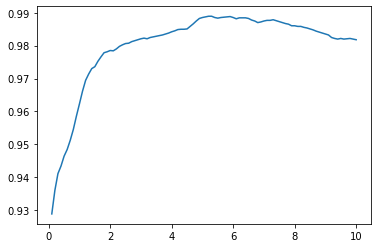

51


In [243]:
plt.plot(gamma_selection, accuracy_results)
plt.show()
index_max = max(range(len(accuracy_results)), key=accuracy_results.__getitem__)
print(index_max) #51, so the gamma = 52 / 10

In [244]:
accuracy_results[51]

0.9889210019267823

In [273]:
#usefuldf.drop(columns=['B', 'C'])
from sklearn.cluster import KMeans

classifier = KMeans(n_clusters = 2)
classifier.fit(data)
print(classifier.cluster_centers_)

# 0 = non-straight, 1 = straight #index 6 is gay relations

[[0.30420299 0.21984076 0.31506514 0.31640618 0.63489708 0.36211497
  0.1437078  0.17237789 0.49005034 0.54901896 0.66648307 0.545251  ]
 [0.38438137 0.48592807 0.47620514 0.93049782 0.70961621 0.48238355
  0.1694089  0.75708387 0.75204069 0.66452036 0.75805731 0.65475843]]


In [279]:
import collections
collections.Counter(classifier.labels_)

Counter({0: 789, 1: 1287})

In [270]:
labels[1]

1.0

In [271]:
correct_classification = 0
for i in range(len(classifier.labels_)):
    if classifier.labels_[i] == labels[i]:
        correct_classification += 1
print(correct_classification)
        

339


In [272]:
correct_classification / classifier.labels_.shape[0]

0.16329479768786126